# General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

**Name:** Nino Corak

**Title of the experiment:** IE- 1 Magneetzweeftrein 

**Starting date:** 25 september 2020

**Expected enddate:** 23 oktober 2020

**Partner:** Floris Fokker

**Goal of the experiment:** De wiskundige relatie tussen de kracht tussen twee magneten en hun separatie bepalen; de basis
van experimenteren, dataverwerking en verslaglegging leren

**Research question:** 1. Wat is de wiskundige relatie tussen de kracht tussen twee schijfmagneten en hun separatie?; 2. zijn de schijfmagneten te modelleren als twee magnetische dipolen?

**Expectations or Hypothesis:** Het is een omgekeerd vierdemachtsverband

**Desired accuracy:** 




In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from prettytable import PrettyTable

In [25]:
# Handige afrondingsfunctie
def sig(x, m): 
    x = float(x)
    y = x
    k = 0
    while True: 
        if y < 1:
            y = y*10
            k -= 1
            continue
        if y >= 10:
            y = y/10
            k += 1
            continue
        break

    y = x
    while True:  
        if y < 1: 
            y = y*10 
            continue 
        if y >= 10: 
            y = y/10
            continue
        z = round(y, m - 1) 
        break               
    
    if z == 10:
        z = 1.0
        k += 1 
               
    if m == 1: 
        z = int(z) 
        z = str(z) 
    else:          
        z = str(z)
        l = 0
        while True:
            if len(z) == m + 1: 
                break           
            else:
                z = z + "0"
                l += 1
                continue
    
    return z, k


def sci_not(x, m):
    significand = sig(x, m)[0]
    exponent = sig(x, m)[1]
    return "{}$\cdot 10^{}$".format(significand, exponent)

def dec_len(z, k):
    z = z.replace(".", "") 
    aantal_cijfers = len(z)
    return aantal_cijfers - (k + 1) 

def estimate(value, error, r): 
    if error >= value:
        print("The error is too large") 
    else:                               
        y = str(value)                  
        z = y.replace(".", "")
        for w in z:                           
            if w != "0":                     
                i = z.index(w) - y.index(".")
                break
        
        error_significand = sig(error, r)[0]
        error_exponent = sig(error, r)[1]
        
        significantie = -i + dec_len(error_significand, error_exponent) 
                                                                        
        rounded_error = sci_not(error, r)                               
        rounded_value = sci_not(value, significantie)   
        
        return "{} $\pm$ {}".format(rounded_value, rounded_error)

            
#--------------------------------------------------------------------------------

def norm_not(x, k):
    y = x.replace(".", "") 
    significantie = len(y)
    if k < 0:
        for i in range(0, -k - 1):
            y = "0" + y
        y = "0." + y
        return y
    if k == 0:
        return x
    else:
        while True:
            if len(y) >= k + 1:
                break
            else:
                y = y + "0"
                continue
        if significantie > k + 1:
            y = y[: k + 1] + "." + y[k + 1:]
            return y
        else:
            return y

def alt_estimate(value, error, r): 
    if error >= value:                            
        print("The error is too large")          
    else:
        y = str(value)
        z = y.replace(".", "")
        for w in z:
            if w != "0":
                i = z.index(w) - y.index(".")
                break
        
        error_significand = sig(error, r)[0]
        error_exponent = sig(error, r)[1]
    
        significantie = -i + dec_len(error_significand, error_exponent) 
        
        fit_value_significand = sig(value, significantie)[0]
        error_significand = sig(error, r)[0]
        fit_value_exponent = sig(value, significantie)[1]
        error_exponent = sig(error, r)[1]
        
        rounded_value = norm_not(fit_value_significand, fit_value_exponent)
        rounded_error = norm_not(error_significand, error_exponent)

        return "{} $\pm$ {}".format(rounded_value, rounded_error)


# Preparation
 


**Assignments:**  

**Method:** We nemen een cilinder met op de onderkant een vaste magneet en op de cilinder een liniaal. We hangen aan een digitale unster een magneet (eerst een aantrekkende, daarna alles opnieuw met een afstotende) en laten hem in de cilinder zakken. Het startpunt is wanneer er voor het eerst een niet-nul waarde voor de kracht verschijnt op de unster. Het eindpunt van de metingen is wanneer de kracht maximaal is volgens de unster en dat punt vinden we door de magneet steeds dieper in de cilinder te laten zakken.

Vervolgens nemen we tien metingen van de afstand, iedere keer met een kracht increment van een tiende van het verschil tussen de maximum- en minimumkracht. Dat wil zeggen, we laten de magneet telkens zakken totdat we ongeveer een voorafaan bepaalde waarde van de kracht hebben bereikt en daar meten we dan de afstand op de liniaal.

**Theory:** Volgens elektromagnetisme is het verband tussen de kracht en de afstand tussen twee magnetische dipolen gegeven door een omgekeerde vierdemachtsrelatie.  

**Independent variable:** De kracht, eigenlijk de kracht omgezet in gewicht via m = F/g want dat is wat de unster weergeeft.

**Dependent variable:** Afstand op de liniaal, deze is in feite de afstand vanaf de bovenkant van de vaste magneet tot de onderkant van het omhulsel van de hangende magneet.

**Controlled variablen:** Geen 

**Measurement instruments \& Settings:** Liniaal op de cilinder nauwkeurig tot de millimeter; digitale unster nauwkeurig tot de gram. Vooraf het meten zetten we de digitale unster op nul met de magneet eraan hangend, ver veg van de vaste magneet.

**Procedure:** al beschreven bij 'Method'.

**Setup (drawing or picture):** Nogal moeilijk tekenen in Python. Zie ons verslag of het dictaat van TN1405-P voor de opstelling. 

**Notes:**

**About accuracy:**


# Execution

In [26]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!

# Dikte van magneten (mm) # Gegeven door fabrikant, tolerantie +/- 0.1 mm # Onzekerheid = 0.1 mm
d_m = 5.0
d_m_onzekerheid = 0.1

# Diktes van omhulsels (mm) # Gevonden met schuifmaat, dus nauwkeurig tot de 0.1 millimeter # Onzekerheid = 0.05 mm
h_1_aantrekkend = 3.8
h_1_aantrekkend_onzekerheid = 0.05
h_1_afstotend = 3.3
h_1_afstotend_onzekerheid = 0.05

# Dikte vaste magneet (mm) # Standaard liniaal # Onzekerheid = 0.5 mm
h_2 = 3.0
h_2_onzekerheid = 0.5

# Meting van waar de bovenkant van het onderste omhulsel zat (relatief tot het nulpunt van de cilinderliniaal) # In mm
h_down = 3.0
h_down_onzekerheid = 0.5

# Aantrekkende magneet (zwart)
#--------------------------------
# Extreme gewichten (kg) # Digitale unster met drie decimalen na de punt # onzekerheid = 0.0005 kg
gewicht_min_aantrekkend = 0.001 
gewicht_max_aantrekkend = 0.249

# Extreme afstanden (mm) # Standaard liniaal # Onzekerheid = 0.5 mm
# Alle volgende afstandsmetingen waren vanaf het nulpunt van de cilinderliniaal tot de onderkant van het omhulsel van de 
# hangende magneet. Deze geven we soms aan met h_meting
h_max_aantrekkend = 40.0
h_min_aantrekkend = 3.0

# Onzekerheid = 0.5 mm, onzekerheid = 0.0005 kg # We vermenigvuldigen de gewichten met 1000 om ze in gram te krijgen
afstanden_metingen_aantrekkend = np.array([h_min_aantrekkend, 4.0, 4.0, 4.0, 7.0, 8.0, 9.0, 11.5, 16.0, h_max_aantrekkend])
afstanden_aantrekkend_onzekerheid = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
gewichten_metingen_aantrekkend = 1000*np.array([gewicht_max_aantrekkend, 0.217, 0.212, 0.149, 0.119, 0.100, 0.074, 0.051, 0.026, gewicht_min_aantrekkend])
gewichten_aantrekkend_onzekerheid = 1000*np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])
#--------------------------------

# Afstotende magneet (wit)
#--------------------------------
# Extreme gewichten (kg) # Digitale unster met drie decimalen na de punt # Onzekerheid = 0.0005 kg
gewicht_min_afstotend = 0.001
gewicht_max_afstotend = 0.090

# Extreme afstanden (mm) # Standaard liniaal # Onzekerheid = 0.5 mm
h_min_afstotend = 8.5
h_max_afstotend = 43.0

# Onzekerheid = 0.5 mm, onzekerheid = 0.0005 kg # We vermenigvuldigen de gewichten met 1000 om ze in gram te krijgen
afstanden_metingen_afstotend = np.array([h_min_afstotend, 9.0, 10.0, 11.0, 11.0, 12.5, 14.0, 16.0, 18.0, 22.0, h_max_afstotend])
afstanden_afstotend_onzekerheid = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
gewichten_metingen_afstotend = 1000*np.array([gewicht_max_afstotend, 0.082, 0.071, 0.061, 0.053, 0.045, 0.034, 0.026, 0.018, 0.010, gewicht_min_afstotend])
gewichten_afstotend_onzekerheid = 1000*np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,0.001, 0.001])
#--------------------------------

# Metingen geprint in een tabel
print("De vaste waarden")
tabel_vaste_waarden = PrettyTable()
tabel_vaste_waarden.field_names = ["Grootheid", "Waarde (mm)", "Onzekerheid (+/- mm)"]
tabel_vaste_waarden.add_row(["d_m", d_m, d_m_onzekerheid])
tabel_vaste_waarden.add_row(["h_1_afstotend", h_1_afstotend, h_1_afstotend_onzekerheid])
tabel_vaste_waarden.add_row(["h_1_aantrekkend", h_1_aantrekkend, h_1_aantrekkend_onzekerheid])
tabel_vaste_waarden.add_row(["h_2", h_2, h_2_onzekerheid])
tabel_vaste_waarden.add_row(["h_down", h_down, h_down_onzekerheid])
print(tabel_vaste_waarden)
print()

print("Metingen van de aantrekkende magneet")
tabel_metingen_aantrekkend = PrettyTable()
tabel_metingen_aantrekkend.add_column("Afstand (mm)", afstanden_metingen_aantrekkend)
tabel_metingen_aantrekkend.add_column("Onzekerheid (+/- mm)", afstanden_aantrekkend_onzekerheid)
tabel_metingen_aantrekkend.add_column("Gewicht (g)", gewichten_metingen_aantrekkend)
tabel_metingen_aantrekkend.add_column("Onzekerheid (+/- g)", gewichten_aantrekkend_onzekerheid)
print(tabel_metingen_aantrekkend)
print()

print("Metingen van de afstotende magneet")
tabel_metingen_afstotend = PrettyTable()
tabel_metingen_afstotend.add_column("Afstand (mm)", afstanden_metingen_afstotend)
tabel_metingen_afstotend.add_column("Onzekerheid (+/- mm)", afstanden_afstotend_onzekerheid)
tabel_metingen_afstotend.add_column("Gewicht (g)", gewichten_metingen_afstotend)
tabel_metingen_afstotend.add_column("Onzekerheid (+/- g)", gewichten_afstotend_onzekerheid)
print(tabel_metingen_afstotend)

De vaste waarden
+-----------------+-------------+----------------------+
|    Grootheid    | Waarde (mm) | Onzekerheid (+/- mm) |
+-----------------+-------------+----------------------+
|       d_m       |     5.0     |         0.1          |
|  h_1_afstotend  |     3.3     |         0.05         |
| h_1_aantrekkend |     3.8     |         0.05         |
|       h_2       |     3.0     |         0.5          |
|      h_down     |     3.0     |         0.5          |
+-----------------+-------------+----------------------+

Metingen van de aantrekkende magneet
+--------------+----------------------+-------------+---------------------+
| Afstand (mm) | Onzekerheid (+/- mm) | Gewicht (g) | Onzekerheid (+/- g) |
+--------------+----------------------+-------------+---------------------+
|     3.0      |         0.5          |    249.0    |         1.0         |
|     4.0      |         0.5          |    217.0    |         1.0         |
|     4.0      |         0.5          |    212.0    

**Observations:**  
**Notes:** We hebben bij de aantrekkende magneet een meetpunt te weinig. Dit kwam doordat we een fout maakte in het uitvoeren van de procedure, gedeeltelijk ook omdat de waarde op de unster heel erg veel schommelde wat het meten moeilijk maakte. Ook omdat die vaak opeens uitging.

# Processing
**Description of processing of raw data into scientific evidence:** We berekenen eerst de hart-tot-hart afstand r, want dat is hetgene waaraan we de kracht tussen de magneten willen relateren. Deze vinden we door:

\begin{equation}
r = \frac{1}{2}d_m + h_2 + h_{1,2} + h_1 + \frac{1}{2}d_m
\end{equation}

Hierbij is $h_{1,2}$ de afstand tussen de bovenkant van het omhulsel van de vaste magneet en de onderkant van het omhulsel van de hangende magneet. Deze berekenen we uit onze metingen van de afstand van de hangende magneet en onze meting van $h_{\text{down}}$:

\begin{equation}
h_{1,2} = h_{\text{meting}} - h_{\text{down}}
\end{equation}

Hieruit berekenen we de onzekerheid van $h_{1,2}$ via formule 9.20 van het dictaat:

\begin{equation}
u(h_{1,2}) = \sqrt{u(h_{\text{meting}})^2 + u(h_{\text{down}})^2}
\end{equation}

an krijg je voor de onzekerheid van $r$:

\begin{equation}
u(r) = \sqrt{u(0.5d_{\text{m}})^2 + u(h_2)^2 + u(h_{1,2})^2 + u(h_1)^2 + u(0.5d_{\text{m}})^2}
\end{equation}

Verder, we zetten ook de gemeten massa's om in hun equivalente krachten, via:

\begin{equation}
F = mg
\end{equation}

Met bijbehorende onzekerheid in $F$:

\begin{equation}
u(F) = u(m)g
\end{equation}

Omdat de onzekerheid in $g$, $u(g) = 0.001 \: \text{m}/\text{s}^2$, verwaarloosbaar is ten opzichte van de onzekerheid van $m$.


In [27]:
# Data processing and analysis: ### WAARSCHUWING ### Niet deze cell meer dan één keer runnnen, want anders blijf je elementen
# uit de array van meetgegevens verwijderen

# De vierde meting in de tabel van de aantrekkende magneet is een uitschieter, en die zullen we in het vervolg weglaten uit de
# metingen van de aantrekkende magneet. Verder, de derde meting in de tabel heeft dezelfde gemeten afstand en zit heel dichtbij
# de tweede tweede meting in gewicht. Die laten we dus ook weg, omdat hij overbodig is.
aantrekkend_afstanden_uitschieter = np.array(afstanden_metingen_aantrekkend[2:4])
aantrekkend_gewichten_uitschieter = np.array(gewichten_metingen_aantrekkend[2:4])

afstanden_metingen_aantrekkend = np.array(list(np.delete(afstanden_metingen_aantrekkend, [2,3])))
gewichten_metingen_aantrekkend = np.array(list(np.delete(gewichten_metingen_aantrekkend, [2,3])))
afstanden_aantrekkend_onzekerheid = np.array(list(np.delete(afstanden_aantrekkend_onzekerheid, [2,3])))
gewichten_aantrekkend_onzekerheid = np.array(list(np.delete(gewichten_aantrekkend_onzekerheid, [2,3])))

# Berekening van h_1,2
h_1_2_aantrekkend = afstanden_metingen_aantrekkend - h_down
h_1_2_afstotend = afstanden_metingen_afstotend - h_down

# Onzekerheid van h_1,2
h_1_2_aantrekkend_onzekerheid = np.sqrt(afstanden_aantrekkend_onzekerheid**2 + h_down_onzekerheid**2)
h_1_2_afstotend_onzekerheid = np.sqrt(afstanden_afstotend_onzekerheid**2 + h_down_onzekerheid**2)

# Berekening van de hart tot hart afstand
r_aantrekkend = 0.5*d_m + h_2 + h_1_2_aantrekkend + h_1_aantrekkend + 0.5*d_m
r_afstotend = 0.5*d_m + h_2 + h_1_2_afstotend + h_1_afstotend + 0.5*d_m

# Onzekerheid van de hart tot hart afstand
r_aantrekkend_onzekerheid = np.sqrt((0.5*d_m_onzekerheid)**2 + (h_2_onzekerheid)**2 + (h_1_2_aantrekkend_onzekerheid)**2 + 
(h_1_aantrekkend_onzekerheid)**2 + (0.5*d_m_onzekerheid)**2)
r_afstotend_onzekerheid = np.sqrt((0.5*d_m_onzekerheid)**2 + (h_2_onzekerheid)**2 + (h_1_2_afstotend_onzekerheid)**2 +
(h_1_afstotend_onzekerheid)**2 + (0.5*d_m_onzekerheid)**2)

# Massa's omzetten naar equivalente krachten
g = 9.812
g_onzekerheid = 0.001

F_aantrekkend = gewichten_metingen_aantrekkend*g
F_afstotend = gewichten_metingen_afstotend*g

# Onzekerheid in kracht
F_aantrekkend_onzekerheid = gewichten_aantrekkend_onzekerheid*g
F_afstotend_onzekerheid = gewichten_afstotend_onzekerheid*g

# Hier maken we tabellen van
print("Waarden van de aantrekkende magneet")
tabel_aantrekkend = PrettyTable()
tabel_aantrekkend.add_column("r (mm)", r_aantrekkend)
tabel_aantrekkend.add_column("Onzekerheid (+/- mm)", r_aantrekkend_onzekerheid)
tabel_aantrekkend.add_column("Kracht (mN)", F_aantrekkend)
tabel_aantrekkend.add_column("Onzekerheid (+/- mN)", F_aantrekkend_onzekerheid)
print(tabel_aantrekkend)
print()

print("Waarden van de afstotende magneet")
tabel_afstotend = PrettyTable()
tabel_afstotend.add_column("r (mm)", r_afstotend)
tabel_afstotend.add_column("Onzekerheid (+/- mm)", r_afstotend_onzekerheid)
tabel_afstotend.add_column("Kracht (mN)", F_afstotend)
tabel_afstotend.add_column("Onzekerheid (+/- mN)", F_afstotend_onzekerheid)
print(tabel_afstotend)
print()

print("De weggelaten meetpunten van de aantrekkende magneet")
tabel_verwijderde_punten = PrettyTable()
tabel_verwijderde_punten.add_column("r (mm)", aantrekkend_afstanden_uitschieter)
tabel_verwijderde_punten.add_column("Gewicht (g)", aantrekkend_gewichten_uitschieter)
print(tabel_verwijderde_punten)


Waarden van de aantrekkende magneet
+--------+----------------------+--------------------+----------------------+
| r (mm) | Onzekerheid (+/- mm) |    Kracht (mN)     | Onzekerheid (+/- mN) |
+--------+----------------------+--------------------+----------------------+
|  11.8  |  0.8703447592764606  | 2443.1879999999996 |        9.812         |
|  12.8  |  0.8703447592764606  | 2129.2039999999997 |        9.812         |
|  15.8  |  0.8703447592764606  |      1167.628      |        9.812         |
|  16.8  |  0.8703447592764606  | 981.1999999999999  |        9.812         |
|  17.8  |  0.8703447592764606  |      726.088       |        9.812         |
|  20.3  |  0.8703447592764606  |      500.412       |        9.812         |
|  24.8  |  0.8703447592764606  |      255.112       |        9.812         |
|  48.8  |  0.8703447592764606  |       9.812        |        9.812         |
+--------+----------------------+--------------------+----------------------+

Waarden van de afstotende m

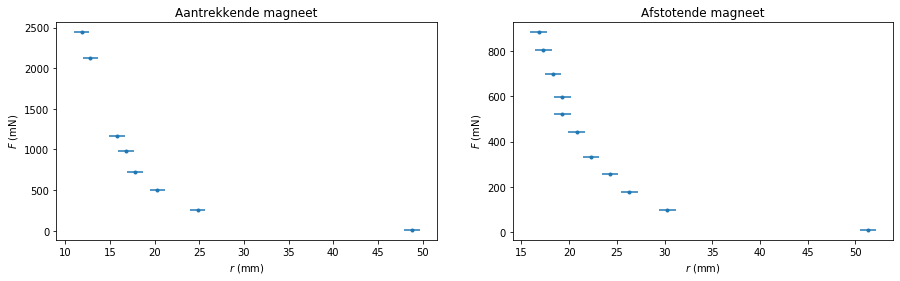

In [28]:
# Grafieken van de data met errorbars

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.errorbar(r_aantrekkend, F_aantrekkend, xerr = r_aantrekkend_onzekerheid, fmt=".")
plt.title("Aantrekkende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
print()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.errorbar(r_afstotend, F_afstotend, xerr= r_afstotend_onzekerheid, fmt=".")
plt.title("Afstotende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
print()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


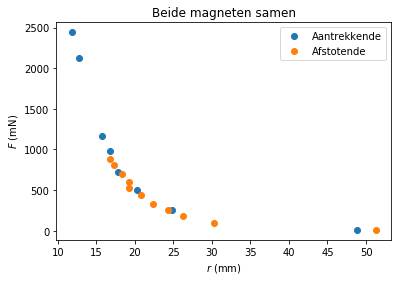

In [29]:
# Beide samen
plt.plot(r_aantrekkend, F_aantrekkend, "o", label="Aantrekkende")
plt.plot(r_afstotend, F_afstotend, "o", label = "Afstotende")
plt.title("Beide magneten samen")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.savefig("beide.eps", format='eps', bbox_inches="tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


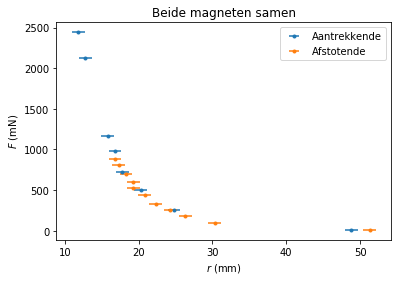

In [30]:
# Zelfde maar dan met errorbars
plt.errorbar(r_aantrekkend, F_aantrekkend, xerr = r_aantrekkend_onzekerheid, fmt=".", label="Aantrekkende")
plt.errorbar(r_afstotend, F_afstotend, xerr = r_afstotend_onzekerheid, fmt=".", label = "Afstotende")
plt.title("Beide magneten samen")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.savefig("beide_errorbars.eps", format='eps', bbox_inches="tight")
plt.show()

#### Eerste curve fit
Het model dat we kiezen dat we gaan fitten op de data is het omgekeerde vierdemachts model, gegeven door:

\begin{equation}
F = \frac{a}{r^4}
\end{equation}

Waarbij $F$ in millinewton is, $r$ in mm en $a$ dus in eenheden bepaalt door deze keuze van de eenheden van $F$ en $r$, namelijk $\text{mN}/\text{mm}^4$. Deze eenheid geven we in het vervolg niet weer in grafieken omdat hij groot en niet van belang is. We geven de gefitte kromme weer over de meetgegevens en plotten ook de residuen daaronder. We geven ook het gemiddelde van de residuen weer, zodat het in een oog opslag duidelijk is of er een systematische fout is, door de lijn van de gemiddelde residu te vergelijken met de horizontale nullijn.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

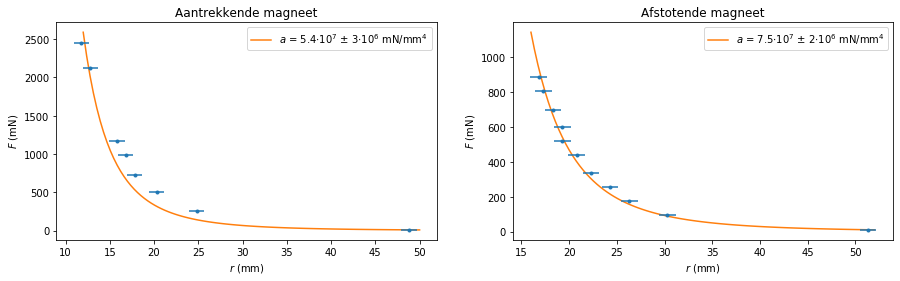

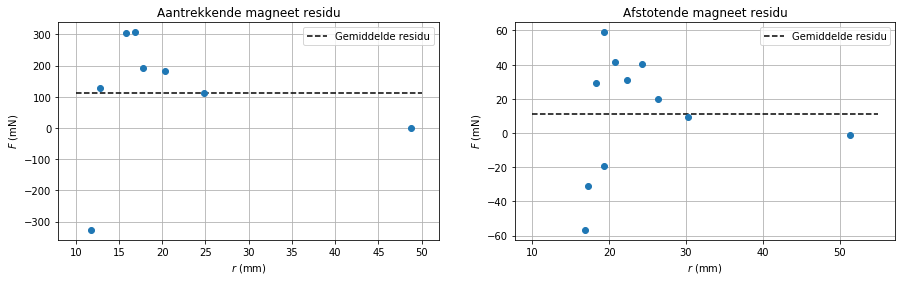

In [31]:
# Errorbarplot en curve fit, met de residuen
def vierde_macht(x, a):
    return a/(x**4)

waarden_aantrekkend, covariantie_aantrekkend = curve_fit(vierde_macht, r_aantrekkend, F_aantrekkend)
waarden_afstotend, covariantie_afstotend = curve_fit(vierde_macht, r_afstotend, F_afstotend)

# Aantrekkende magneet
a_aantrekkend = waarden_aantrekkend[0]
a_aantrekkend_onzekerheid = np.sqrt(covariantie_aantrekkend[0][0])
domein_aantrekkend = np.linspace(12, 50, 100)
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.errorbar(r_aantrekkend, F_aantrekkend, xerr = r_aantrekkend_onzekerheid, fmt=".", zorder = 2)
plt.plot(domein_aantrekkend, vierde_macht(domein_aantrekkend, a_aantrekkend), zorder = 1, \
label="$a$ = {} mN/mm$^4$".format(estimate(a_aantrekkend, a_aantrekkend_onzekerheid, 1)))
plt.title("Aantrekkende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
a_afstotend = waarden_afstotend[0]
a_afstotend_onzekerheid = np.sqrt(covariantie_afstotend[0][0])
domein_afstotend = np.linspace(16, 52, 100)
plt.errorbar(r_afstotend, F_afstotend, xerr = r_afstotend_onzekerheid, fmt=".", zorder = 2)
plt.plot(domein_afstotend, vierde_macht(domein_afstotend, a_afstotend), zorder = 1, \
label="$a$ = {} mN/mm$^4$".format(estimate(a_afstotend, a_afstotend_onzekerheid, 1)))
plt.title("Afstotende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.savefig("fit.eps", format='eps', bbox_inches="tight")

# Residuen
residu_aantrekkend = F_aantrekkend - vierde_macht(r_aantrekkend, a_aantrekkend)
residu_afstotend = F_afstotend - vierde_macht(r_afstotend, a_afstotend)

residu_aantrekkend_gemiddelde = np.average(residu_aantrekkend)
residu_afstotend_gemiddelde = np.average(residu_afstotend)

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(r_aantrekkend, residu_aantrekkend, "o")
plt.hlines(residu_aantrekkend_gemiddelde, 10, 50, linestyles="dashed", label="Gemiddelde residu")
plt.title("Aantrekkende magneet residu")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.grid()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.plot(r_afstotend, residu_afstotend, "o")
plt.hlines(residu_afstotend_gemiddelde, 10, 55, linestyles="dashed", label="Gemiddelde residu")
plt.title("Afstotende magneet residu")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.grid()
plt.savefig("fit_residu.eps", format='eps', bbox_inches="tight")


#### Systematische fout onderzoeken
Het model waarmee we fitten om een mogelijke systematische fout te onderzoeken is:
    
\begin{equation}
F = \frac{a}{(r + \Delta r)^4}
\end{equation}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

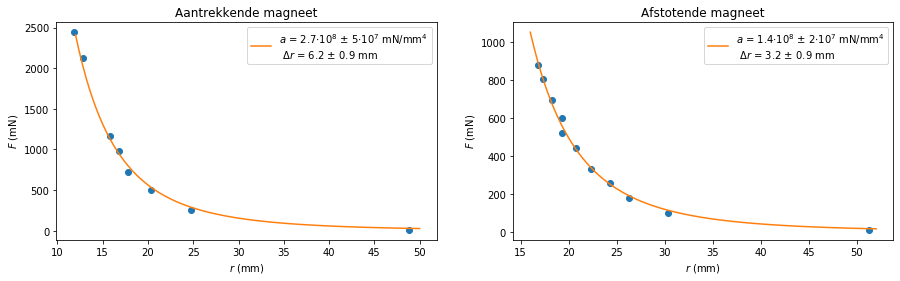

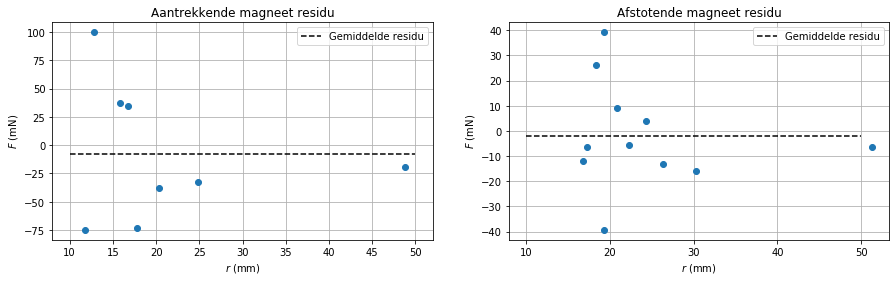

In [32]:
# Systematische fout
def vierde_macht_aangepast(x, a, b):
    return a/((x + b)**4)

# Aantrekkende magneet
waarden_aangepast_aantrekkend = curve_fit(vierde_macht_aangepast, r_aantrekkend, F_aantrekkend, \
p0 = (a_aantrekkend, 0))[0]
covariantie_aangepast_aantrekkend = curve_fit(vierde_macht_aangepast, r_aantrekkend, F_aantrekkend, \
p0 = (a_aantrekkend, 0))[1]

a_aangepast_aantrekkend = waarden_aangepast_aantrekkend[0]
delta_r_aantrekkend = waarden_aangepast_aantrekkend[1]

a_aangepast_aantrekkend_onzekerheid = np.sqrt(covariantie_aangepast_aantrekkend[0][0])
delta_r_aantrekkend_onzekerheid = np.sqrt(covariantie_aangepast_aantrekkend[1][1])

plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(r_aantrekkend, F_aantrekkend, 'o')

plt.plot(domein_aantrekkend, vierde_macht_aangepast(domein_aantrekkend, a_aangepast_aantrekkend, delta_r_aantrekkend), \
label="$a$ = {} mN/mm$^4$\n $\Delta r$ = {} mm".format(estimate(a_aangepast_aantrekkend, a_aangepast_aantrekkend_onzekerheid, 1), \
alt_estimate(delta_r_aantrekkend, delta_r_aantrekkend_onzekerheid, 1)))

plt.title("Aantrekkende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()

# Afstotende magneet
waarden_aangepast_afstotend = curve_fit(vierde_macht_aangepast, r_afstotend, F_afstotend, \
p0 = (a_afstotend, 0))[0]
covariantie_aangepast_afstotend = curve_fit(vierde_macht_aangepast, r_afstotend, F_afstotend, \
p0 = (a_afstotend, 0))[1]

a_aangepast_afstotend = waarden_aangepast_afstotend[0]
delta_r_afstotend = waarden_aangepast_afstotend[1]

a_aangepast_afstotend_onzekerheid = np.sqrt(covariantie_aangepast_afstotend[0][0])
delta_r_afstotend_onzekerheid = np.sqrt(covariantie_aangepast_afstotend[1][1])

plt.subplot(1, 2, 2)
plt.plot(r_afstotend, F_afstotend, 'o')

plt.plot(domein_afstotend, vierde_macht_aangepast(domein_afstotend, a_aangepast_afstotend, delta_r_afstotend), \
label="$a$ = {} mN/mm$^4$\n $\Delta r$ = {} mm".format(estimate(a_aangepast_afstotend, a_aangepast_afstotend_onzekerheid, 1), \
alt_estimate(delta_r_afstotend, delta_r_afstotend_onzekerheid, 1)))

plt.title("Afstotende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.savefig("systematisch.eps", format='eps', bbox_inches="tight")

# Residuen
residu_systematisch_aantrekkend = F_aantrekkend - vierde_macht_aangepast(r_aantrekkend, a_aangepast_aantrekkend, delta_r_aantrekkend)
residu_systematisch_afstotend = F_afstotend - vierde_macht_aangepast(r_afstotend, a_aangepast_afstotend, delta_r_afstotend)

residu_systematisch_aantrekkend_gemiddelde = np.average(residu_systematisch_aantrekkend)
residu_systematisch_afstotend_gemiddelde = np.average(residu_systematisch_afstotend)

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(r_aantrekkend, residu_systematisch_aantrekkend, "o")
plt.hlines(residu_systematisch_aantrekkend_gemiddelde, 10, 50, linestyles="dashed", label="Gemiddelde residu")
plt.title("Aantrekkende magneet residu")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.grid()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.plot(r_afstotend, residu_systematisch_afstotend, "o")
plt.hlines(residu_systematisch_afstotend_gemiddelde, 10, 50, linestyles="dashed", label="Gemiddelde residu")
plt.title("Afstotende magneet residu")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.grid()
plt.savefig("systematisch_residu.eps", format='eps', bbox_inches="tight")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


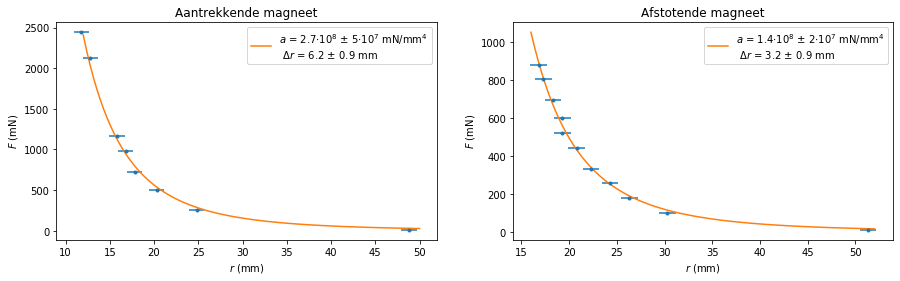

In [33]:
# Zelfde, maar dan met errorbars

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.errorbar(r_aantrekkend, F_aantrekkend, xerr = r_aantrekkend_onzekerheid, fmt=".")

plt.plot(domein_aantrekkend, vierde_macht_aangepast(domein_aantrekkend, a_aangepast_aantrekkend, delta_r_aantrekkend), \
label="$a$ = {} mN/mm$^4$\n $\Delta r$ = {} mm".format(estimate(a_aangepast_aantrekkend, a_aangepast_aantrekkend_onzekerheid, 1), \
alt_estimate(delta_r_aantrekkend, delta_r_aantrekkend_onzekerheid, 1)))

plt.title("Aantrekkende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.errorbar(r_afstotend, F_afstotend, xerr = r_afstotend_onzekerheid, fmt=".")

plt.plot(domein_afstotend, vierde_macht_aangepast(domein_afstotend, a_aangepast_afstotend, delta_r_afstotend), \
label="$a$ = {} mN/mm$^4$\n $\Delta r$ = {} mm".format(estimate(a_aangepast_afstotend, a_aangepast_afstotend_onzekerheid, 1), \
alt_estimate(delta_r_afstotend, delta_r_afstotend_onzekerheid, 1)))

plt.title("Afstotende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.savefig("systematisch_errorbars.eps", format='eps', bbox_inches="tight")

#### Lineariseren
Nu willen we het verband lineariseren door $1/r^4$ zelf als variabele te gebruiken. De parameter van het eerste model behoudt dan zijn waarde. Het enige wat wel verandert zijn de eenheden. We zetten $r$ om naar centimeter. Zo is de enige verandering die de vorige gevonden waarde van $a$ ondergaat, een vermenigvuldiging met een macht van tien.

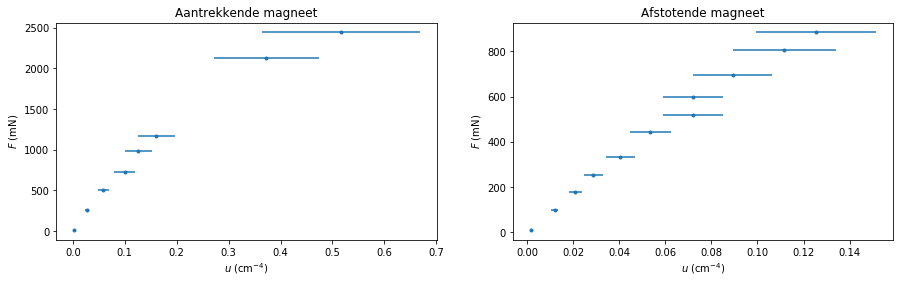

In [34]:
# Lineairisatie
# We zetten r eerst om naar centimeter (door te delen door 10) zodat de x-as van de lineaire plot niet lelijke afmetingen heeft
lineair_aantrekkend = 1/((r_aantrekkend/10)**4)
lineair_afstotend = 1/((r_afstotend/10)**4)

lineair_aantrekkend_onzekerheid = 4*((r_aantrekkend/10)**(-5))*(r_aantrekkend_onzekerheid/10)
lineair_afstotend_onzekerheid = 4*((r_afstotend/10)**(-5))*(r_afstotend_onzekerheid/10)

plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.title("Aantrekkende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.errorbar(lineair_aantrekkend, F_aantrekkend, xerr = lineair_aantrekkend_onzekerheid, fmt=".")

plt.subplot(1, 2, 2)
plt.title("Afstotende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.errorbar(lineair_afstotend, F_afstotend, xerr = lineair_afstotend_onzekerheid, fmt=".")
plt.savefig("lineair.eps", format='eps', bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

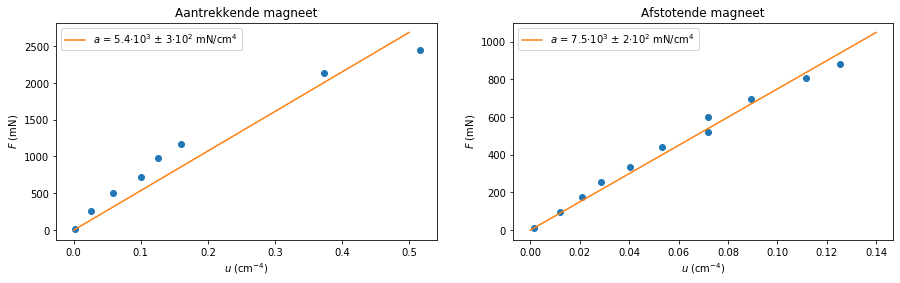

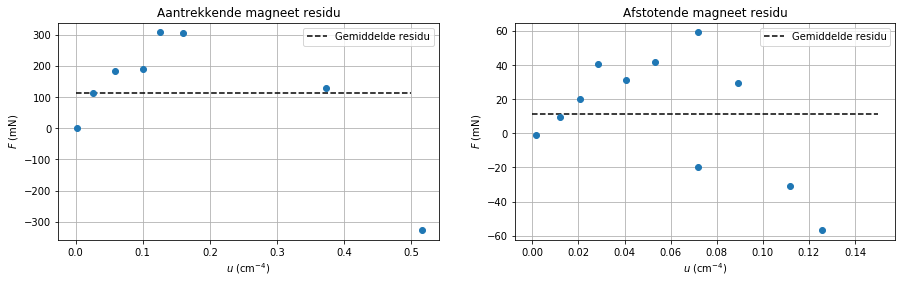

In [35]:
# Berekening van parameters aan de hand van linearisatie
def lineair(x, a):
    return a*x

a_lineair_aantrekkend = curve_fit(lineair, lineair_aantrekkend, F_aantrekkend)[0][0]
a_lineair_afstotend = curve_fit(lineair, lineair_afstotend, F_afstotend)[0][0]

onzekerheid_aantrekkend = np.sqrt(curve_fit(lineair, lineair_aantrekkend, F_aantrekkend)[1][0][0])
onzekerheid_afstotend = np.sqrt(curve_fit(lineair, lineair_afstotend, F_afstotend)[1][0][0])

domein_lineair_aantrekkend = np.linspace(0, 0.5, 100)
domein_lineair_afstotend = np.linspace(0, 0.14, 100)

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.title("Aantrekkende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.plot(lineair_aantrekkend, F_aantrekkend, "o")
plt.plot(domein_lineair_aantrekkend, lineair(domein_lineair_aantrekkend, a_lineair_aantrekkend), \
label = "$a$ = {} mN/cm$^4$".format(estimate(a_lineair_aantrekkend, onzekerheid_aantrekkend, 1)))
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.title("Afstotende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.plot(lineair_afstotend, F_afstotend, "o")
plt.plot(domein_lineair_afstotend, lineair(domein_lineair_afstotend, a_lineair_afstotend), \
label = "$a$ = {} mN/cm$^4$".format(estimate(a_lineair_afstotend, onzekerheid_afstotend, 1)))
plt.legend()
plt.savefig("lineaire_fit.eps", format='eps', bbox_inches="tight")

# Residuen
residu_lineair_aantrekkend = F_aantrekkend - lineair(lineair_aantrekkend, a_lineair_aantrekkend)
residu_lineair_afstotend = F_afstotend - lineair(lineair_afstotend, a_lineair_afstotend)

residu_lineair_aantrekkend_gemiddelde = np.average(residu_lineair_aantrekkend)
residu_lineair_afstotend_gemiddelde = np.average(residu_lineair_afstotend)

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(lineair_aantrekkend, residu_lineair_aantrekkend, "o")
plt.hlines(residu_lineair_aantrekkend_gemiddelde, 0, 0.5, linestyles="dashed", label="Gemiddelde residu")
plt.title("Aantrekkende magneet residu")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.grid()


# Afstotende magneet
plt.subplot(1, 2, 2)
plt.plot(lineair_afstotend, residu_lineair_afstotend, "o")
plt.hlines(residu_lineair_afstotend_gemiddelde, 0, 0.15, linestyles="dashed", label="Gemiddelde residu")
plt.title("Afstotende magneet residu")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.grid()
plt.savefig("lineaire_fit_residu.eps", format='eps', bbox_inches="tight")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


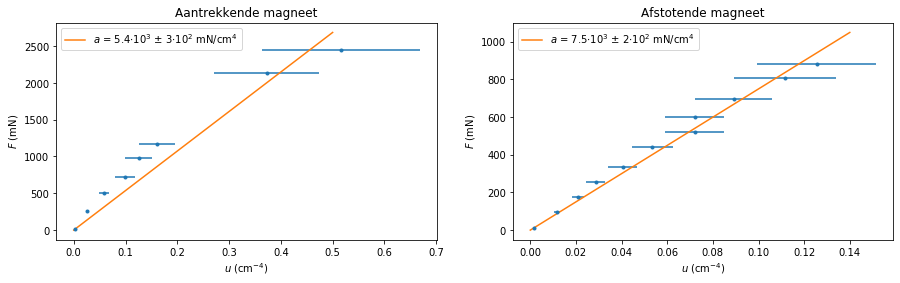

In [36]:
# Lineaire plots met errorbars (gewoon het zelfde als hierboven, maar dan met de onzekerheden van 1/r^4 uitgerekend en geplot)
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.title("Aantrekkende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.errorbar(lineair_aantrekkend, F_aantrekkend, xerr=lineair_aantrekkend_onzekerheid, fmt=".", zorder=2)
plt.plot(domein_lineair_aantrekkend, lineair(domein_lineair_aantrekkend, a_lineair_aantrekkend), \
label = "$a$ = {} mN/cm$^4$".format(estimate(a_lineair_aantrekkend, onzekerheid_aantrekkend, 1)))
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Afstotende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.errorbar(lineair_afstotend, F_afstotend, xerr=lineair_afstotend_onzekerheid, fmt=".", zorder=2)
plt.plot(domein_lineair_afstotend, lineair(domein_lineair_afstotend, a_lineair_afstotend), \
label = "$a$ = {} mN/cm$^4$".format(estimate(a_lineair_afstotend, onzekerheid_afstotend, 1)))
plt.legend()
plt.savefig("lineaire_fit_errorbars.eps", format='eps', bbox_inches="tight")


#### Exponent bepalen
We kunnen ook de best passende exponent bepalen als we het volgende model gebruiken:

\begin{equation}
F = \frac{a}{r^n}
\end{equation}

Het is handig om dit uit te drukken met logaritmes en zo te fitten:

\begin{equation}
\text{ln}(F) = \text{ln}(a) - n\cdot \text{ln}(r)
\end{equation}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

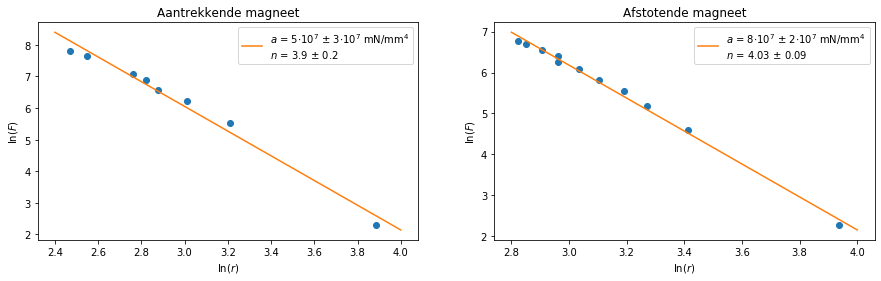

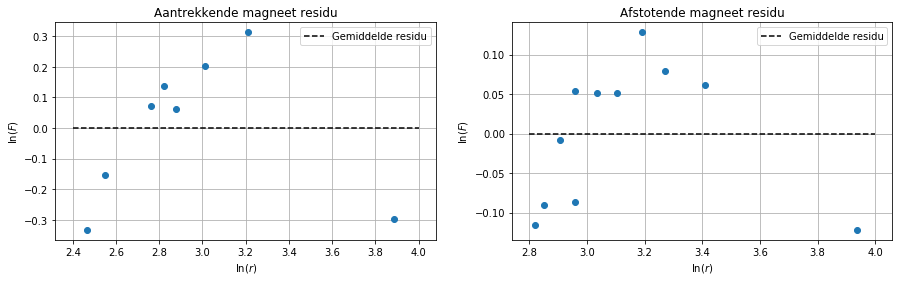

In [37]:
# Exponent bepalen
def lineair2(x, a, b):
    return -a*x + b

r_log_aantrekkend = np.log(r_aantrekkend)
r_log_afstotend = np.log(r_afstotend)

F_log_aantrekkend = np.log(F_aantrekkend)
F_log_afstotend = np.log(F_afstotend)

a_log_aantrekkend = curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[0][1]
a_log_afstotend = curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[0][1]

a_log_aantrekkend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[1][1][1])
a_log_afstotend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[1][1][1])

n_aantrekkend = curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[0][0]
n_afstotend = curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[0][0]

n_aantrekkend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[1][0][0])
n_afstotend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[1][0][0])

log_domein_aantrekkend = np.linspace(2.4, 4, 100)
log_domein_afstotend = np.linspace(2.8, 4, 100)

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(r_log_aantrekkend, F_log_aantrekkend, "o")
plt.plot(log_domein_aantrekkend, lineair2(log_domein_aantrekkend, n_aantrekkend, a_log_aantrekkend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_aantrekkend), \
np.exp(a_log_aantrekkend)*a_log_aantrekkend_onzekerheid, 1), alt_estimate(n_aantrekkend, n_aantrekkend_onzekerheid, 1)))
plt.title("Aantrekkende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.plot(r_log_afstotend, F_log_afstotend, "o")
plt.plot(log_domein_afstotend, lineair2(log_domein_afstotend, n_afstotend, a_log_afstotend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_afstotend), \
np.exp(a_log_afstotend)*a_log_afstotend_onzekerheid, 1), alt_estimate(n_afstotend, n_afstotend_onzekerheid, 1)))
plt.title("Afstotende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()
plt.savefig("exponent.eps", format='eps', bbox_inches="tight")

# Residuen
residu_log_aantrekkend = F_log_aantrekkend - lineair2(r_log_aantrekkend, n_aantrekkend, a_log_aantrekkend)
residu_log_afstotend = F_log_afstotend - lineair2(r_log_afstotend, n_afstotend, a_log_afstotend)

residu_log_aantrekkend_gemiddelde = np.average(residu_log_aantrekkend)
residu_log_afstotend_gemiddelde = np.average(residu_log_afstotend)

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(r_log_aantrekkend, residu_log_aantrekkend, "o")
plt.hlines(residu_log_aantrekkend_gemiddelde, 2.4, 4, linestyles="dashed", label="Gemiddelde residu")
plt.title("Aantrekkende magneet residu")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()
plt.grid()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.plot(r_log_afstotend, residu_log_afstotend, "o")
plt.hlines(residu_log_afstotend_gemiddelde, 2.8, 4, linestyles="dashed", label="Gemiddelde residu")
plt.title("Afstotende magneet residu")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()
plt.grid()
plt.savefig("exponent_residu.eps", format='eps', bbox_inches="tight")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


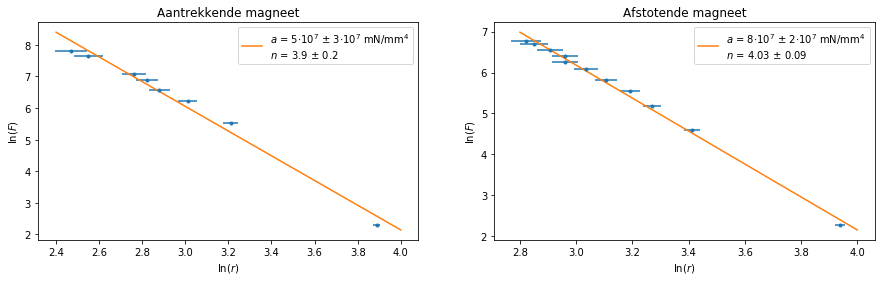

In [38]:
# Zelfde met errorbars

r_log_aantrekkend_onzekerheid = r_aantrekkend_onzekerheid/r_aantrekkend
r_log_afstotend_onzekerheid = r_afstotend_onzekerheid/r_afstotend

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.errorbar(r_log_aantrekkend, F_log_aantrekkend, xerr = r_log_aantrekkend_onzekerheid , fmt=".")
plt.plot(log_domein_aantrekkend, lineair2(log_domein_aantrekkend, n_aantrekkend, a_log_aantrekkend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_aantrekkend), \
np.exp(a_log_aantrekkend)*a_log_aantrekkend_onzekerheid, 1), alt_estimate(n_aantrekkend, n_aantrekkend_onzekerheid, 1)))
plt.title("Aantrekkende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.errorbar(r_log_afstotend, F_log_afstotend, xerr = r_log_afstotend_onzekerheid, fmt=".")
plt.plot(log_domein_afstotend, lineair2(log_domein_afstotend, n_afstotend, a_log_afstotend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_afstotend), \
np.exp(a_log_afstotend)*a_log_afstotend_onzekerheid, 1), alt_estimate(n_afstotend, n_afstotend_onzekerheid, 1)))
plt.title("Afstotende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()
plt.savefig("exponent_errorbars.eps", format='eps', bbox_inches="tight")


#### Andere manier om de exponent te onderzoeken
De reden waarom we hebben gewerkt met een logaritmetansformatie om de exponent van het verband te bepalen, is dat het model gegeven in de presentatie, namelijk:

\begin{equation}
F = \frac{a}{(r + \Delta r)^n}
\end{equation}

niet heel zinvolle resultaten geeft. Kijk zelf maar hieronder. Grenzen stellen op $n$ zou ook niet helpen. Bijvoorbeeld, als je de grenzen $3 \leq n \leq 5$ stelt, dan zal $n$ simpelweg de maximale grens worden, in dit geval 5 (zolang die grens niet groter is dan $\approx 9.73$ in het geval van de afstotende magneet). Wel moeten we de grens $n \geq 0$ stellen, omdat anders $n$ graag negatief wordt, wat al helemaal niet kan.

Omdat dit model zinloze resultaten geeft, geven we de residuen niet weer.

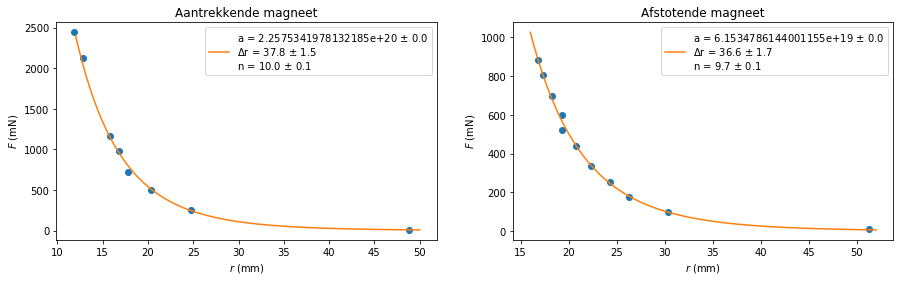

In [39]:
def n_macht(x, a, b, n):
    return a/((x + b)**n)

# Aantrekkende magneet
waarden_aan, covariantie_aan = curve_fit(n_macht, r_aantrekkend, F_aantrekkend, p0 = (a_aantrekkend, 0, 4), \
bounds = ((-np.inf, -np.inf, 0), (np.inf, np.inf , 10)), maxfev = 6000)

fout_a_aan =np.sqrt(covariantie_aan[0][0])
fout_delta_r_aan = np.sqrt(covariantie_aan[1][1])
fout_n_aan = np.sqrt(covariantie_aan[2][2])

plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(r_aantrekkend, F_aantrekkend, "o")
plt.plot(domein_aantrekkend, n_macht(domein_aantrekkend, waarden_aan[0], waarden_aan[1], waarden_aan[2]), \
label="a = {} $\pm$ {}\n$\Delta$r = {} $\pm$ {}\nn = {} $\pm$ {}".format(round(waarden_aan[0], 1), round(fout_a_aan, 1), \
round(waarden_aan[1], 1), round(fout_delta_r_aan, 1), round(waarden_aan[2], 1), round(fout_n_aan, 1)))
plt.title("Aantrekkende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()

# Afstotende magneet
waarden_af, covariantie_af = curve_fit(n_macht, r_afstotend, F_afstotend, p0 = (a_afstotend, 0, 4), \
bounds = ((-np.inf, -np.inf, 0), (np.inf, np.inf , np.inf)), maxfev = 6000)

fout_a_af =np.sqrt(covariantie_af[0][0])
fout_delta_r_af = np.sqrt(covariantie_af[1][1])
fout_n_af = np.sqrt(covariantie_af[2][2])

plt.subplot(1, 2, 2)
plt.plot(r_afstotend, F_afstotend, "o")
plt.plot(domein_afstotend, n_macht(domein_afstotend, waarden_af[0], waarden_af[1], waarden_af[2]), \
label="a = {} $\pm$ {}\n$\Delta$r = {} $\pm$ {}\nn = {} $\pm$ {}".format(round(waarden_af[0], 1), round(fout_a_af, 1), \
round(waarden_af[1], 1), round(fout_delta_r_af, 1), round(waarden_af[2], 1), round(fout_n_af, 1)))
plt.title("Afstotende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()


#### Het remanente veld
Herinner dat het model $F = a/r^4$ was. Met onze gevonden waarden voor $a$ kunnen we nu het remantente veld $B$ gaan berekenen. Deze is te bepalen met de formule:

\begin{equation}
B = \mu_0 \frac{m}{V}
\end{equation}

Waarbij $V$ het volume van de schijfmagneet is en $m$ zijn dipoolmoment. Als we dit opschrijven als $B = \mu_0 m V^{-1}$, dan zien we dat de onzekerheid in $B$ volgens formule 9.20 uit het dictaat is gegeven door:

\begin{equation}
u(B) = \mu_0 \sqrt{\left ( V^{-1}\cdot u(m) \right )^2 + \left ( -V^{-2}\cdot m\cdot u(V) \right )^2}
\end{equation}

De $\mu_0$ mogen we eruit halen omdat die geen onzekerheid heeft (eigenlijk een relatief heel kleine onzekerheid). Vervolgens vinden we beide onzekerheden $u(V)$ en $u(m)$ en ook hoe je de waarden $V$ en $m$ zelf uitrekent.

#### Het volume
Als we $s$ de straal van de schijfmagneet noemen, dan kunnen we $V$ op de volgende manier berekenen:

\begin{equation}
V = \pi s^2 d_m
\end{equation}

Herinner dat $d_m$ de dikte, ofwel hoogte, is van de schijfmagneet. Volgens de datasheet is de diameter van de schijfmagneet $d = 10 \: \text{mm}$ met een onzekerheid van $\pm 0.1 \: \text{mm}$. Dus, omdat $s = 0.5d$, kunnen we de onzekerheid van $s$ berekenen als:

\begin{equation}
u(s) = \sqrt{\left( 0.5\cdot u(d) \right )^2 + \left ( u(0.5)\cdot d \right )^2} = 0.5u(d) = 0.05 \: \text{mm}
\end{equation}

Dit kan omdat de onzekerheid in $0.5$ uiteraard nul is. Dus, de onzekerheid in $V$ wordt volgens formule 9.20 uit het dictaat het volgende:

\begin{equation}
u(V) = \pi\sqrt{\left (2s\cdot d_m\cdot u(s) \right )^2 + \left ( s^2\cdot u(d_m) \right )^2}
\end{equation}

De $\pi$ mogen we naar buiten brengen omdat hij geen onzekerheid heeft.

#### Het dipoolmoment
Volgens de theorie geldt er voor de constante $a$ (zie dictaat):

\begin{equation}
a = \frac{3\mu_0 m^2}{2\pi}
\end{equation}

Echter, we kunnen deze formule niet gelijk toepassen op onze gevonden waardes van $a$, aangezien deze formule alleen geldt als alle grootheden in standaareenheden zitten, wat bij ons niet het geval is. We moeten dus onze gevonden fitwaardes omzetten naar standaardeenheden. Dat doen we zo: schrijf $F_{\text{N}}$ en $r_{\text{m}}$ voor de kracht en afstand in standaardeenheden en schrijf $F_{\text{mN}}$ en $r_{\text{cm}}$ voor de kracht en afstand in de eenheden die wij gebruiken (onze $r$ is in centimeter omdat we de fitwaardes van de linearisatie gebruiken en daar was $r$ naar centimeters omgezet). Als we met $a$ de constante in het model in standaardeenheden aangeven en met $a_{\text{gevonden}}$ onze gevonden waarde voor de constante aangeven, dan gelden de volgende twee formules:

\begin{equation}
F_{\text{N}} = \frac{a}{r_{\text{m}}^4}\\
F_{\text{mN}} = \frac{a_{\text{gevonden}}}{r_{\text{cm}}^4}\\
\end{equation}

Maar het is duidelijk dat $F_{\text{mN}} = 10^3 F_{\text{N}}$ en $r_{\text{cm}} = 10^2 r_{\text{m}}$. Dus, we kunnen de tweede formule ook schrijven als:

\begin{equation}
10^3F_{\text{N}} = \frac{a_{\text{gevonden}}}{(10^2r_{\text{m}})^4}
\end{equation}

Ofwel:

\begin{equation}
F_{\text{N}} = \frac{10^{-11}a_{\text{gevonden}}}{r_{\text{m}}^4}
\end{equation}

Je ziet dus, door dit te vergelijken met de formule in standaardeenheden, dat er geldt dat $a = 10^{-11}a_{\text{gevonden}}$. Nu we onze fitwaarde hebben omgezet in standaardeenheden, kunnen we verder. 

Het dipoolmoment berekenen we volgens de eerder gegeven formule voor $a$ als:

\begin{equation}
m = \sqrt{\frac{2\pi a}{3\mu_0}}
\end{equation}

Om de onzekerheden te berekenen met formule 9.20 uit het dictaat is het handig om dit op te schrijven als:

\begin{equation}
m = \sqrt{\frac{2\pi}{3\mu_0}}\cdot a^{1/2}
\end{equation}

Dan krijg je dus:

\begin{equation}
u(m) = \sqrt{\frac{2\pi}{3\mu_0}}\cdot \sqrt{\left ( \frac{1}{2} a^{-\frac{1}{2}}\cdot u(a) \right )^2} = \sqrt{\frac{2\pi}{3\mu_0}}\cdot \frac{1}{2} a^{-\frac{1}{2}}\cdot u(a)
\end{equation}

Waarbij we de uitdrukking met $\mu_0$ en $\pi$ erbuiten mogen laten omdat die geen onzekerheid heeft.

In [40]:
# Remanente veld berekenen 
# We doen alles hier in standaardeenheden, zodat we B in tesla krijgen uiteindelijk

# Constanten
pi = np.pi
mu_0 = 4*pi*(10**-7)

# Volume berekenen
h = d_m*(10**-3) # Dit is d_m, de hoogte van de magneet, omgezet naar standaardeenheden
h_onzekerheid = d_m_onzekerheid*(10**-3)

s = 5*(10**-3) 
s_onzekerheid = 0.00005

V = pi*(s**2)*h # We vermenigvuldigen d_m nog met 10^-3 om hem in meters te krijgen
V_onzekerheid = pi*np.sqrt((2*s*h*s_onzekerheid)**2 + ((s**2)*h_onzekerheid)**2)

# Dipoolmoment berekenen
a_aan = a_lineair_aantrekkend*(10**-11) # Dit zijn dus onze gevonden fitwaardes, omgezet naar standaardeenheden
a_af = a_lineair_afstotend*(10**-11)

a_aan_onzekerheid = onzekerheid_aantrekkend*(10**-11)
a_af_onzekerheid = onzekerheid_afstotend*(10**-11)

m_aantrekkend = np.sqrt((2*pi*a_aan)/(3*mu_0))
m_afstotend = np.sqrt((2*pi*a_af)/(3*mu_0))

m_aantrekkend_onzekerheid = np.sqrt((2*pi)/(3*mu_0))*0.5*a_aan_onzekerheid/np.sqrt(a_aan)
m_afstotend_onzekerheid = np.sqrt((2*pi)/(3*mu_0))*0.5*a_af_onzekerheid/np.sqrt(a_af)

# Remanente veld berekenen
B_aantrekkend = mu_0*m_aantrekkend/V
B_afstotend = mu_0*m_afstotend/V

B_aantrekkend_onzekerheid = mu_0*np.sqrt((m_aantrekkend_onzekerheid/V)**2 + (m_aantrekkend*V_onzekerheid/(V**2))**2)
B_afstotend_onzekerheid = mu_0*np.sqrt((m_afstotend_onzekerheid/V)**2 + (m_afstotend*V_onzekerheid/(V**2))**2)

fit_waardes = PrettyTable()
fit_waardes.add_column("Magneet", ["Aantrekkend", "Afstotend"])
fit_waardes.add_column("a (mN/cm^4)", [a_lineair_aantrekkend, a_lineair_afstotend])
fit_waardes.add_column("u(a) (+/- mN/cm^4)", [onzekerheid_aantrekkend, onzekerheid_afstotend])

print("Bij het lineariseren van de data vonden we de hieronderstaande fitwaardes voor a, met bijhorende onzekerheid")
print(fit_waardes)
print()

print("Dit geeft berekende remanente velden van:")
print("Aantrekkend: B = {} T +/- {} T ".format(round(B_aantrekkend, 2), round(B_aantrekkend_onzekerheid, 2)))
print("Afstotend: B = {} T +/- {} T ".format(round(B_afstotend, 2), round(B_afstotend_onzekerheid, 2)))


Bij het lineariseren van de data vonden we de hieronderstaande fitwaardes voor a, met bijhorende onzekerheid
+-------------+-------------------+--------------------+
|   Magneet   |    a (mN/cm^4)    | u(a) (+/- mN/cm^4) |
+-------------+-------------------+--------------------+
| Aantrekkend | 5370.043522203031 | 349.82476734476995 |
|  Afstotend  | 7486.314761483254 | 161.63947443192956 |
+-------------+-------------------+--------------------+

Dit geeft berekende remanente velden van:
Aantrekkend: B = 0.96 T +/- 0.04 T 
Afstotend: B = 1.13 T +/- 0.03 T 


**Describing the pattern in the processed data:**  


**Notes:**

# Discussion



Er zijn twee punten die ik wil bespreken:

(1) Waarom blijkt het uit de tweede curve fit dat er een grote systematische fout is?

(2) Waarom geeft de aantrekkende magneet consistent kleinere waardes voor $a$ (behalve bij het onderzoeken van de systematische fout) dan de afstotende magneet?

---

**(1)** Ik vermoed dat de reden hiervoor is dat we de waarden $h_1$ en $h_2$ fout hebben gemeten. Wat wij hebben gedaan bij het meten van $h_1$ is aannemen dat de dikte van het omhulsel simpelweg de zichtbare rand is. Maar dit is uiteraard een aanname; je weet niet hoe diep de magneet erin zit. De juiste manier was om heel het omhulsel te meten, daar $d_{\text{m}}$ van af te trekken en dat dan te delen door 2. 

Wat we fout hebben gedaan bij het meten van $h_2$, is dat we aannamen dat de nul van de cilinderliniaal bij de bovenkant van de vaste magneet zat. Daarmee konden we dan $h_2$ meten door de afstand van de bovenkant van het omhulsel van de vaste magneet te bepalen. Wederom, dat is een aanname en konden we niet weten, dus is het niet gerechtvaardigt. Wat we hadden moeten doen, was de schuifmaat gebruiken om $h_2$ te meten, niet de cilinderliniaal.

Wij vermoeden dat de ware waarden van $h_1$ en $h_2$ groter zijn dan onze slechte metingen, en dat het dus begrijpelijk is waarom de curve fit aangeeft dat onze waardes van $r$ systematisch te klein zijn. Ook is het niet gek dat deze fout een aantal millimeter is, als we zowel $h_1$ als $h_2$ slecht hebben gemeten.

**(2)** De reden waarom de aantrekkende magneet zulke verschillende fitwaarden geeft, ligt waarschijnlijjk in de laatste twee metingen van de aantrekkende magneet. Zoals je kan zien in de grafiek hieronder zijn zij de enige twee die afwijken van de fitlijn van afstotende magneet. Deze twee punten hebben ook een grote onzekerheid, zoals te zien is in gelineariseerde errorbarplot hierboven.

Waarom zie je dit dan niet terug, de grote onzekerheid van de meetpunten, in de onzekerheid van $B$? Nou, het probleem is dat de onzekerheid die curve_fit() teruggeeft niks te maken heeft met de onzekerheid in de meetpunten. Immers, welke informatie geef je aan curve_fit() over de onzekerheden van de meetpunten? Niks, is het antwoord. Ofwel, door het gebruik van curve_fit() worden de onzekerheden in de meetpunten niet doorgerekend in de onzekerheid van $B$.

---

In ieder geval, rekening houdend met (1) en (2), het lijkt mij dat de verkregen fit waarde $a$ van de afstotende magneet betrouwbaarder is dan die van de aantrekkende magneet. Als we dan $B$ opnieuw berekenen door $a$ te herdefinieren als de gevonden fitwaarde $a$ bij het onderzoek naar de systematische fout, krijgen we de volgende waarde (zie de tweede cell hieronder). We zouden het nog juister kunnen doen door die twee onzekere meetpunten van de aantrekkende magneet weg te laten en de rest allemaal samen te voegen tot een set meetgegevens.

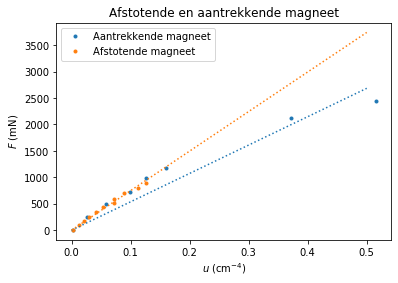

In [41]:
plt.plot(lineair_aantrekkend, F_aantrekkend, ".", label="Aantrekkende magneet")
plt.plot(lineair_afstotend, F_afstotend, ".", label="Afstotende magneet")

domein = np.linspace(0, 0.5, 100)

plt.plot(domein, lineair(domein, a_lineair_aantrekkend), linestyle=":", color="C0")
plt.plot(domein, lineair(domein, a_lineair_afstotend), linestyle=":", color="C1")
plt.title("Afstotende en aantrekkende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.show()

In [42]:
# B berekenen met systematische fout
### WAARSCHUWING ### Als je deze cell runt, dan worden a_af, m_afstotend, B_afstotend en hun geassocieerde onzekerheden

# Afstotend
a_af = a_aangepast_afstotend*(10**-15) # geherdefinieerd. Let daar dus op wanneer je teruggaat naar de cellen hierboven
a_af_onzekerheid = a_aangepast_afstotend_onzekerheid*(10**-15)

m_afstotend = np.sqrt((2*pi*a_af)/(3*mu_0))
m_afstotend_onzekerheid = np.sqrt((2*pi)/(3*mu_0))*0.5*a_af_onzekerheid/np.sqrt(a_af)

B_afstotend = mu_0*m_afstotend/V
B_afstotend_onzekerheid = mu_0*np.sqrt((m_afstotend_onzekerheid/V)**2 + (m_afstotend*V_onzekerheid/(V**2))**2)

# Aantrekkend
a_aan = a_aangepast_aantrekkend*(10**-15) 
a_aan_onzekerheid = a_aangepast_aantrekkend_onzekerheid*(10**-15)

m_aantrekkend = np.sqrt((2*pi*a_aan)/(3*mu_0))
m_aantrekkend_onzekerheid = np.sqrt((2*pi)/(3*mu_0))*0.5*a_aan_onzekerheid/np.sqrt(a_aan)

B_aantrekkend = mu_0*m_aantrekkend/V
B_aantrekkend_onzekerheid = mu_0*np.sqrt((m_aantrekkend_onzekerheid/V)**2 + (m_aantrekkend*V_onzekerheid/(V**2))**2)

print("Aantrekkend: B = {} T +/- {} T".format(round(B_aantrekkend, 1), round(B_aantrekkend_onzekerheid, 1)))
print("Afstotend: B = {} T +/- {} T ".format(round(B_afstotend, 1), round(B_afstotend_onzekerheid, 1)))

Aantrekkend: B = 2.1 T +/- 0.2 T
Afstotend: B = 1.6 T +/- 0.1 T 


# Conclusion
De waardes verkregen zonder rekening te houden met de systematische fout zijn onbetrouwbaar, ook al is de exponent heel mooi. Maar, we kunnen ze ook niet repareren aan de hand van $\Delta r$ door bijvoorbeeld $\Delta r$ op te tellen bij $r$. Dit komt omdat $\Delta r$ niet noodzakelijk de echte systematische fout voorsteldt, d.w.z. hoeveel millimeters we mislopen door het fout meten van $h_1$ en $h_2$. Dus, het theoretische model kan niet worden geverifieerd of ontkracht; we kunnen niet met zekerheid het wiskundige verband tussen $F$ en $r$ bepalen uit onze meetgegevens en verwerking, vanwege de systematische fout en de onmogelijkheid om correct rekening te hoduden met deze.

# Additional notes, remarks, explanations, thoughts etc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


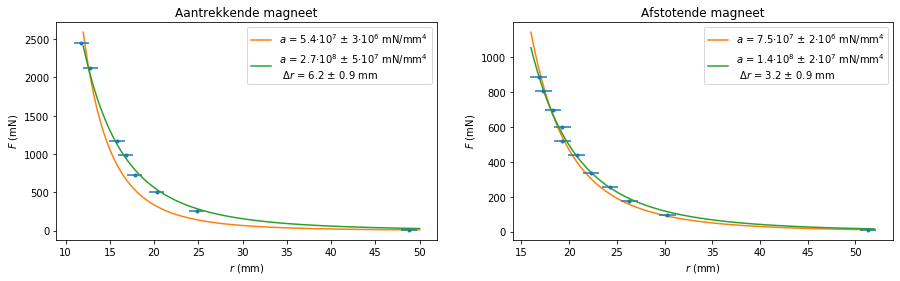

In [43]:
# Oorspronkelijke fit en systematischefoutfit in één plot

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.errorbar(r_aantrekkend, F_aantrekkend, xerr = r_aantrekkend_onzekerheid, fmt=".", zorder = 2)
plt.plot(domein_aantrekkend, vierde_macht(domein_aantrekkend, a_aantrekkend), zorder = 1, \
label="$a$ = {} mN/mm$^4$".format(estimate(a_aantrekkend, a_aantrekkend_onzekerheid, 1)))
plt.plot(domein_aantrekkend, vierde_macht_aangepast(domein_aantrekkend, a_aangepast_aantrekkend, delta_r_aantrekkend), \
label="$a$ = {} mN/mm$^4$\n $\Delta r$ = {} mm".format(estimate(a_aangepast_aantrekkend, a_aangepast_aantrekkend_onzekerheid, 1), \
alt_estimate(delta_r_aantrekkend, delta_r_aantrekkend_onzekerheid, 1)))
plt.title("Aantrekkende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.errorbar(r_afstotend, F_afstotend, xerr = r_afstotend_onzekerheid, fmt=".", zorder = 2)
plt.plot(domein_afstotend, vierde_macht(domein_afstotend, a_afstotend), zorder = 1, \
label="$a$ = {} mN/mm$^4$".format(estimate(a_afstotend, a_afstotend_onzekerheid, 1)))
plt.plot(domein_afstotend, vierde_macht_aangepast(domein_afstotend, a_aangepast_afstotend, delta_r_afstotend), \
label="$a$ = {} mN/mm$^4$\n $\Delta r$ = {} mm".format(estimate(a_aangepast_afstotend, a_aangepast_afstotend_onzekerheid, 1), \
alt_estimate(delta_r_afstotend, delta_r_afstotend_onzekerheid, 1)))
plt.title("Afstotende magneet")
plt.xlabel("$r$ (mm)")
plt.ylabel("$F$ (mN)")
plt.legend()

plt.savefig("systematisch_en_oorspronkelijk.eps", format="eps", bbox_inches="tight")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


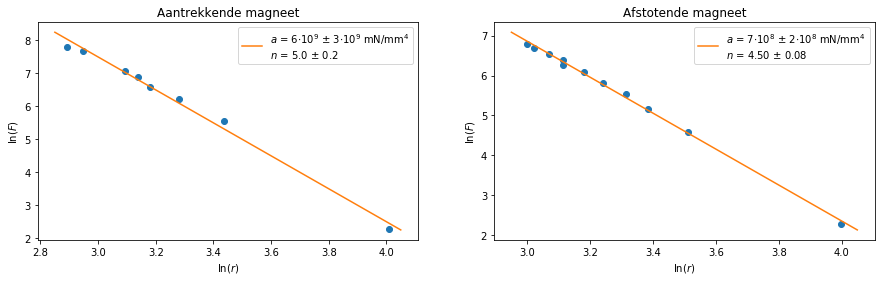

In [44]:
# n met systematische fout
r_aantrekkend_nieuw = r_aantrekkend + delta_r_aantrekkend
r_afstotend_nieuw = r_afstotend + delta_r_afstotend

r_log_aantrekkend = np.log(r_aantrekkend_nieuw)
r_log_afstotend = np.log(r_afstotend_nieuw)

F_log_aantrekkend = np.log(F_aantrekkend)
F_log_afstotend = np.log(F_afstotend)

a_log_aantrekkend = curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[0][1]
a_log_afstotend = curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[0][1]

a_log_aantrekkend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[1][1][1])
a_log_afstotend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[1][1][1])

n_aantrekkend = curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[0][0]
n_afstotend = curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[0][0]

n_aantrekkend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_aantrekkend, F_log_aantrekkend)[1][0][0])
n_afstotend_onzekerheid = np.sqrt(curve_fit(lineair2, r_log_afstotend, F_log_afstotend)[1][0][0])

log_domein_aantrekkend = np.linspace(2.85, 4.05, 100)
log_domein_afstotend = np.linspace(2.95, 4.05, 100)

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(r_log_aantrekkend, F_log_aantrekkend, "o")
plt.plot(log_domein_aantrekkend, lineair2(log_domein_aantrekkend, n_aantrekkend, a_log_aantrekkend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_aantrekkend), \
np.exp(a_log_aantrekkend)*a_log_aantrekkend_onzekerheid, 1), alt_estimate(n_aantrekkend, n_aantrekkend_onzekerheid, 1)))
plt.title("Aantrekkende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.plot(r_log_afstotend, F_log_afstotend, "o")
plt.plot(log_domein_afstotend, lineair2(log_domein_afstotend, n_afstotend, a_log_afstotend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_afstotend), \
np.exp(a_log_afstotend)*a_log_afstotend_onzekerheid, 1), alt_estimate(n_afstotend, n_afstotend_onzekerheid, 1)))
plt.title("Afstotende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()
plt.savefig("exponent_systematisch.eps", format="eps", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


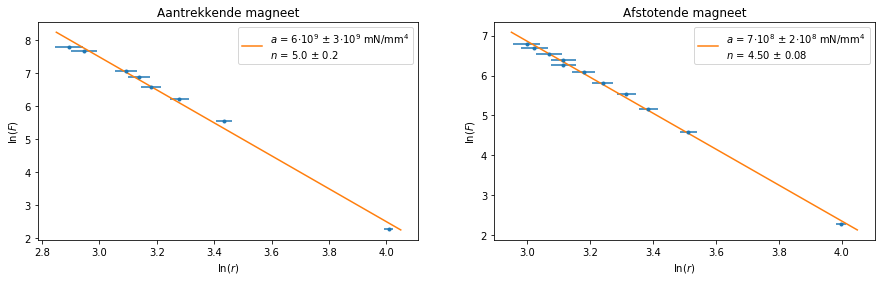

In [45]:
# Zelfde met errorbars

r_log_aantrekkend_onzekerheid = r_aantrekkend_onzekerheid/r_aantrekkend_nieuw
r_log_afstotend_onzekerheid = r_afstotend_onzekerheid/r_afstotend_nieuw

# Aantrekkende magneet
plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.errorbar(r_log_aantrekkend, F_log_aantrekkend, xerr = r_log_aantrekkend_onzekerheid , fmt=".")
plt.plot(log_domein_aantrekkend, lineair2(log_domein_aantrekkend, n_aantrekkend, a_log_aantrekkend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_aantrekkend), \
np.exp(a_log_aantrekkend)*a_log_aantrekkend_onzekerheid, 1), alt_estimate(n_aantrekkend, n_aantrekkend_onzekerheid, 1)))
plt.title("Aantrekkende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()

# Afstotende magneet
plt.subplot(1, 2, 2)
plt.errorbar(r_log_afstotend, F_log_afstotend, xerr = r_log_afstotend_onzekerheid, fmt=".")
plt.plot(log_domein_afstotend, lineair2(log_domein_afstotend, n_afstotend, a_log_afstotend), \
label="$a$ = {} mN/mm$^4$\n$n$ = {}".format(estimate(np.exp(a_log_afstotend), \
np.exp(a_log_afstotend)*a_log_afstotend_onzekerheid, 1), alt_estimate(n_afstotend, n_afstotend_onzekerheid, 1)))
plt.title("Afstotende magneet")
plt.xlabel("ln($r$)")
plt.ylabel("ln($F$)")
plt.legend()
plt.savefig("exponent_systematisch_errorbars.eps", format='eps', bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


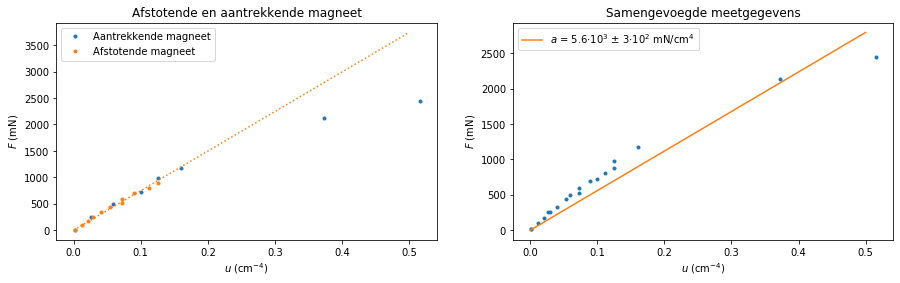

In [46]:
# Meetgegevens samenvoegen
r = np.concatenate((r_aantrekkend, r_afstotend))
F = np.concatenate((F_aantrekkend, F_afstotend))

r_onzekerheid = np.concatenate((r_aantrekkend_onzekerheid, r_afstotend_onzekerheid))
F_onzekerheid = np.concatenate((F_aantrekkend_onzekerheid, F_afstotend_onzekerheid))

u = 1/((r/10)**4)

waarden_nieuw = curve_fit(lineair, u, F)
a_nieuw = waarden_nieuw[0][0]
a_nieuw_onzekerheid = np.sqrt(waarden_nieuw[1][0][0])

plt.subplots(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.plot(lineair_aantrekkend, F_aantrekkend, ".", label="Aantrekkende magneet")
plt.plot(lineair_afstotend, F_afstotend, ".", label="Afstotende magneet")
plt.plot(domein, lineair(domein, a_lineair_afstotend), linestyle=":", color="C1")
plt.title("Afstotende en aantrekkende magneet")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(u, F, ".")
plt.plot(domein_lineair_aantrekkend, lineair(domein_lineair_aantrekkend, a_nieuw), \
label = "$a$ = {} mN/cm$^4$".format(estimate(a_nieuw, a_nieuw_onzekerheid, 1)))
plt.title("Samengevoegde meetgegevens")
plt.xlabel("$u$ (cm$^{-4}$)")
plt.ylabel("$F$ (mN)")
plt.legend()
plt.savefig("beide_lineair.eps", format="eps", bbox_inches="tight")